# Uczenie nienadzorowane - klasteryzacja

Uczenie nienadzorowane różni sie istotnie od uczenia nadzorowanego - klastrowane przykłady nie posiadają odgórnie sprecyzowanej klasy (brak etykiet), a celem jest taki podział danych, by w ramach jednego klastra zgromadzone zostały przykłady jak najbardziej podobne do siebie.

W życiu codziennym algorytmy te są wykorzystywane równie często - ze względu na możliwość działania na danych niezaetykietowanych.

Zaczniemy od wygenerowania danych do poklastrowania.

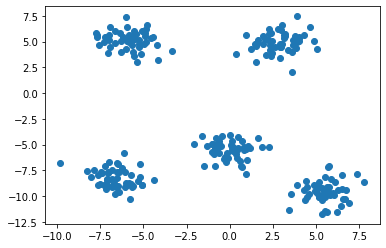

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=250, n_features=2, centers=5, cluster_std=1.,
                  random_state=10)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
plt.show()

Zaczniemy od algorytmu K-means.

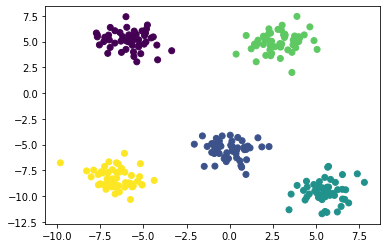

In [3]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
y_km = model.fit_predict(X)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y_km)
plt.show()

Dodatkowo wyświetlimy sobie nasze centroidy.

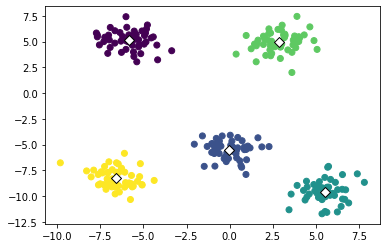

In [4]:
centroids = model.cluster_centers_

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y_km)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=50, color='w', edgecolors='k')
plt.show()

Jak widać algorytm poradził sobie całkiem nieźle. Sprawdźmy co stanie się dla nieco trudniejszego przykładu.

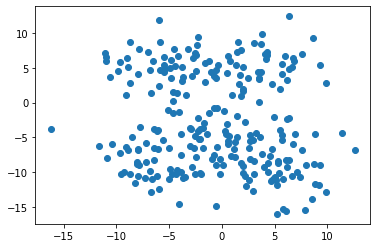

In [5]:
X, y = make_blobs(n_samples=250, n_features=2, centers=5, cluster_std=3,
                  random_state=10)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
plt.show()

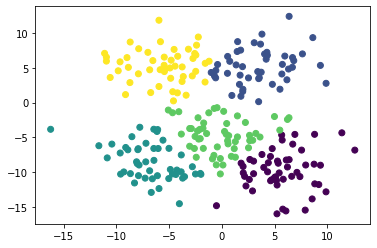

In [6]:
model = KMeans(n_clusters=5)
y_km = model.fit_predict(X)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y_km)
plt.show()

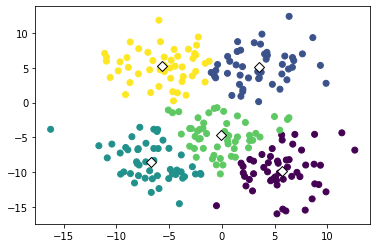

In [7]:
centroids = model.cluster_centers_

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y_km)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=50, color='w', edgecolors='k')
plt.show()

A co z danymi, które nie są liniowo separowalne?

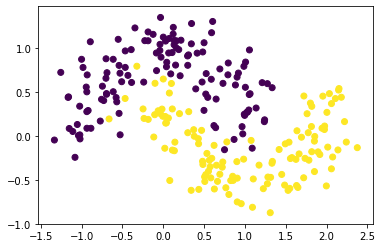

In [8]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=250, noise=0.2, random_state=42)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

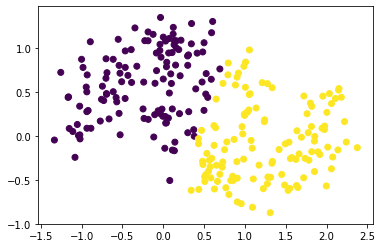

In [9]:
model = KMeans(n_clusters=2)
y_km = model.fit_predict(X)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y_km)
plt.show()

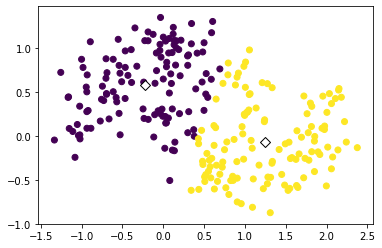

In [10]:
centroids = model.cluster_centers_

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y_km)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=50, color='w', edgecolors='k')
plt.show()

Tu jak widać już nie jest tak różowo. Przejdźmy jednak do nieco bardziej rzeczywistych danych.

Moglibyśmy wykorzystać w tym celu rzeczywiste dane (iris, glass etc.) i sprawdzić jak dobrze nasz algorytm poradzi sobie w porównaniu do Ground Truth, ale my spróbujemy dokonać klasteryzacji stacji pogody w Kanadzie.

>So there are 25 columns and now we need to learn more about the Columns, The names that are difficult to guess

>Stn_Name === Station Name

>Prov === Province

>Tm === Mean Temperature (°C)

>Tn === Lowest Monthly Minimum Temperature

>Tx === Highest Monthly Maximum Temperature

>DwTm === Days Without Valid Mean Temperature

>DwTx === Days Without Valid Maximum Temperature

>DwTn === Days Without Valid Minimum Temperature

>D === Mean Temperature Difference from Normal

>S === Snowfall (cm)

>DwS === Days Without Snowfall

>S%N === Percent of Normal Snowfall

>P === Total Precipitation (mm)

>DwP === Days Without Valid Precipitation

>P%N === Percent of Normal Precipitation

>Pd === No. of days with precipitation 1mm or More

>BS === Bright Sunshine days

>DwBS === Days Without valid Bright Sunshine

>BS% === Percent of Normal Bright Sunshine

>HDD === Degree Days Below  18∘ C

>CDD === Degree Days Above  18∘ C

>Stn_No === Station Number; Climate Station Identifier (1st 3 Digits==Indicate drainage basin, Last 4 Digits Sorting Alphabetically)

In [11]:
weather = pd.read_csv('datasets/weather-stations.csv')
display(weather.head())
display(weather.describe())

Stn_Name     Lat     Long Prov   Tm  DwTm    D    Tx  DwTx  \
0               CHEMAINUS  48.935 -123.742   BC  8.2   0.0  NaN  13.5   0.0   
1  COWICHAN LAKE FORESTRY  48.824 -124.133   BC  7.0   0.0  3.0  15.0   0.0   
2           LAKE COWICHAN  48.829 -124.052   BC  6.8  13.0  2.8  16.0   9.0   
3        DISCOVERY ISLAND  48.425 -123.226   BC  NaN   NaN  NaN  12.5   0.0   
4     DUNCAN KELVIN CREEK  48.735 -123.728   BC  7.7   2.0  3.4  14.5   2.0   

    Tn  ...  DwP    P%N  S_G    Pd  BS  DwBS  BS%    HDD  CDD   Stn_No  
0  1.0  ...  0.0    NaN  0.0  12.0 NaN   NaN  NaN  273.3  0.0  1011500  
1 -3.0  ...  0.0  104.0  0.0  12.0 NaN   NaN  NaN  307.0  0.0  1012040  
2 -2.5  ...  9.0    NaN  NaN  11.0 NaN   NaN  NaN  168.1  0.0  1012055  
3  NaN  ...  NaN    NaN  NaN   NaN NaN   NaN  NaN    NaN  NaN  1012475  
4 -1.0  ...  2.0    NaN  NaN  11.0 NaN   NaN  NaN  267.7  0.0  1012573  

[5 rows x 25 columns]

Lat         Long           Tm         DwTm           D  \
count  1341.000000  1341.000000  1256.000000  1256.000000  357.000000   
mean     51.185221   -96.670827   -12.062341     2.186306   -2.768908   
std       6.216434    23.285512    10.416366     4.903077    4.840769   
min      41.949000  -140.868000   -38.200000     0.000000  -12.000000   
25%      46.983000  -116.501000   -18.500000     0.000000   -7.100000   
50%      49.850000  -101.400000   -13.800000     0.000000   -4.600000   
75%      53.283000   -73.750000    -5.600000     2.000000    2.700000   
max      82.500000   -52.753000     9.600000    27.000000    7.800000   

                Tx         DwTx           Tn         DwTn           S  ...  \
count  1260.000000  1260.000000  1260.000000  1260.000000  586.000000  ...   
mean      2.612302     1.814286   -26.322381     1.816667   35.219966  ...   
std       8.855823     4.249613    12.573066     4.438321   39.575586  ...   
min     -29.800000     0.000000   -49.700000     0.000000    0.000000  ...   
25%      -3.500000     0.000000   -35.425000     0.000000    9.000000  ...   
50%       2.500000     0.000000   -29.100000     0.000000   25.000000  ...   
75%      10.000000     1.000000   -21.700000     1.000000   49.875000  ...   
max      22.000000    27.000000     5.300000    27.000000  245.000000  ...   

                 P          DwP         P%N         S_G           Pd   BS  \
count  1227.000000  1227.000000  209.000000  798.000000  1227.000000  0.0   
mean     50.402363     2.612062  118.368421   31.325815     7.480033  NaN   
std      62.312551     4.889425   64.527522   33.799751     4.740601  NaN   
min       0.000000     0.000000    0.000000    0.000000     0.000000  NaN   
25%      13.200000     0.000000   75.000000    2.000000     4.000000  NaN   
50%      27.100000     0.000000  104.000000   26.000000     7.000000  NaN   
75%      60.500000     3.000000  147.000000   45.000000    11.000000  NaN   
max     516.800000    27.000000  400.000000  253.000000    28.000000  NaN   

       DwBS  BS%          HDD     CDD  
count   0.0  0.0  1256.000000  1256.0  
mean    NaN  NaN   773.277150     0.0  
std     NaN  NaN   311.119277     0.0  
min     NaN  NaN    26.000000     0.0  
25%     NaN  NaN   560.100000     0.0  
50%     NaN  NaN   813.500000     0.0  
75%     NaN  NaN   988.000000     0.0  
max     NaN  NaN  1523.400000     0.0  

[8 rows x 22 columns]

Trochę dużo tu NaNów. Ile dokładnie?

In [12]:
weather.isna().sum()

Stn_Name       0
Lat            0
Long           0
Prov           0
Tm            85
DwTm          85
D            984
Tx            81
DwTx          81
Tn            81
DwTn          81
S            755
DwS          755
S%N         1143
P            114
DwP          114
P%N         1132
S_G          543
Pd           114
BS          1341
DwBS        1341
BS%         1341
HDD           85
CDD           85
Stn_No         0
dtype: int64

Wyrzućmy kolumny gdzie Nanów jest za dużo (więcej niż 30%)

In [13]:
weather = weather.loc[:, weather.isnull().mean() < .3]

In [14]:
weather.isna().sum()

Stn_Name      0
Lat           0
Long          0
Prov          0
Tm           85
DwTm         85
Tx           81
DwTx         81
Tn           81
DwTn         81
P           114
DwP         114
Pd          114
HDD          85
CDD          85
Stn_No        0
dtype: int64

Zostało już niewiele NaNów (~10%) - usuńmy więc wiersze z nanami.

In [15]:
weather.dropna(inplace=True)
weather.describe()

Lat         Long           Tm         DwTm           Tx  \
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000   
mean     50.950539   -97.471895   -11.535696     2.270341     3.082677   
std       5.757043    23.136281    10.328233     4.964097     8.684320   
min      42.043000  -140.868000   -36.400000     0.000000   -28.900000   
25%      46.942000  -117.165000   -17.800000     0.000000    -3.400000   
50%      49.872000  -104.008000   -13.400000     0.000000     3.300000   
75%      53.162500   -74.311000    -4.800000     2.000000    10.350000   
max      82.500000   -52.753000     9.500000    27.000000    22.000000   

              DwTx           Tn         DwTn            P          DwP  \
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000   
mean      1.846019   -25.880490     1.834646    50.091426     2.524934   
std       4.208333    12.654909     4.314045    62.909236     4.666180   
min       0.000000   -49.700000     0.000000     0.000000     0.000000   
25%       0.000000   -35.000000     0.000000    13.000000     0.000000   
50%       0.000000   -29.000000     0.000000    26.400000     0.000000   
75%       1.000000   -21.000000     1.000000    59.650000     3.000000   
max      27.000000     5.300000    27.000000   516.800000    27.000000   

                Pd          HDD     CDD  
count  1143.000000  1143.000000  1143.0  
mean      7.446194   757.104549     0.0  
std       4.762158   309.067992     0.0  
min       0.000000    26.000000     0.0  
25%       4.000000   528.250000     0.0  
50%       7.000000   797.200000     0.0  
75%      11.000000   966.400000     0.0  
max      28.000000  1523.400000     0.0

In [16]:
X = weather[['Lat', 'Long', 'Tm', 'Tx', 'Tn']] # potem jeszcze 'P'

Nie zgadzają nam sie jeszcze tutaj skale. Dokonajmy więc standaryzacji.

In [17]:
from sklearn.preprocessing import StandardScaler

X_standard = X.copy()
X_standard[:] = StandardScaler().fit_transform(X)
display(X_standard.head())
display(X_standard.describe())

Lat      Long        Tm        Tx        Tn
0 -0.350253 -1.135948  1.911686  1.200081  2.125045
1 -0.369542 -1.152855  1.795448  1.372881  1.808824
2 -0.368673 -1.149352  1.776075  1.488082  1.848352
4 -0.385008 -1.135342  1.863253  1.315281  1.966935
5 -0.437662 -1.122846  1.969804  1.154000  2.196195

Lat          Long           Tm            Tx           Tn
count  1.143000e+03  1.143000e+03  1143.000000  1.143000e+03  1143.000000
mean  -4.973178e-17 -6.962449e-16     0.000000  4.973178e-17     0.000000
std    1.000438e+00  1.000438e+00     1.000438  1.000438e+00     1.000438
min   -1.547919e+00 -1.876494e+00    -2.408465 -3.684420e+00    -1.883059
25%   -6.965892e-01 -8.515511e-01    -0.606788 -7.468075e-01    -0.720946
50%   -1.874245e-01 -2.826282e-01    -0.180585  2.503569e-02    -0.246614
75%    3.843865e-01  1.001502e+00     0.652449  8.371990e-01     0.385829
max    5.482549e+00  1.933693e+00     2.037609  2.179285e+00     2.464983

W algorytmie K-Means musimy sami zadecydować o liczbie klastrów. Możemy jednak spróbować zastosować metodę "elbow".

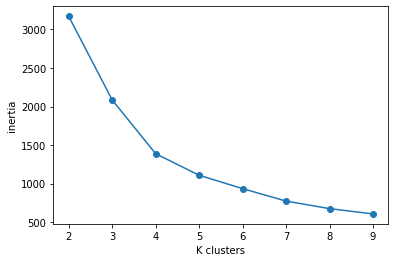

In [18]:
inertias = []
ks = range(2, 10)

for k in ks:
    model = KMeans(n_clusters=k, random_state=42).fit(X_standard)
    inertias.append(model.inertia_)
    
fig, ax = plt.subplots()
ax.plot(ks, inertias, '-o')
ax.set_xlabel('K clusters')
ax.set_ylabel('inertia')
ax.set_xticks(ks)
plt.show()

Zgodnie z *elbow method* powinniśmy wybrać miejsce wyraźnego zakrzywienia wykresu. Tutaj niestety takiego nie ma, więc musimy wybrać jakiś "złoty środek".

Możemy jednak spróbować przeprowadzić analizę silhouette (sylwetki?). 

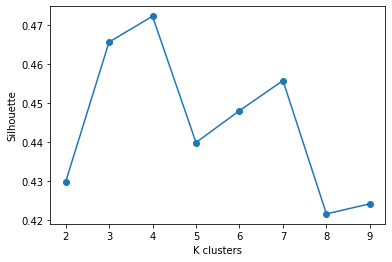

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette = []
ks = range(2, 10)

for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    prediction = model.fit_predict(X_standard)
    silhouette.append(silhouette_score(X_standard, prediction))
    
fig, ax = plt.subplots()
ax.plot(ks, silhouette, '-o')
ax.set_xlabel('K clusters')
ax.set_ylabel('Silhouette')
ax.set_xticks(ks)
plt.show()

Widać, że mamy tutaj wyraźnie najwyższą wartość dla 4 klastrów.

Lat   Long    Tm  DwTm    Tx  DwTx    Tn  DwTn      P  DwP    Pd  \
cluster                                                                      
0        47.0  -74.9 -15.9   3.5  -1.4   2.7 -30.7   2.7   52.0  2.4   8.7   
1        50.5 -122.9   4.8   1.8  12.5   1.6  -4.0   1.6  111.5  2.6  10.5   
2        63.4  -99.0 -27.9   1.2 -11.1   1.1 -40.9   1.0    8.1  2.6   2.4   
3        53.0 -113.5 -10.5   1.2   8.3   1.0 -28.5   0.9   19.1  2.7   5.1   

            HDD  CDD  
cluster               
0         831.5  0.0  
1         344.6  0.0  
2        1229.0  0.0  
3         766.2  0.0

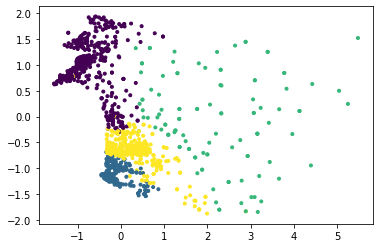

In [20]:
model = KMeans(n_clusters=4)
y_pred = model.fit_predict(X_standard)
weather['cluster'] = y_pred
mean_clusters = pd.DataFrame(weather.groupby('cluster').mean()).round(1)
display(mean_clusters)

fig, ax = plt.subplots()
ax.scatter(X_standard.Lat, X_standard.Long, c=y_pred, marker='.')
plt.show()

Dajmy to na mapę!

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


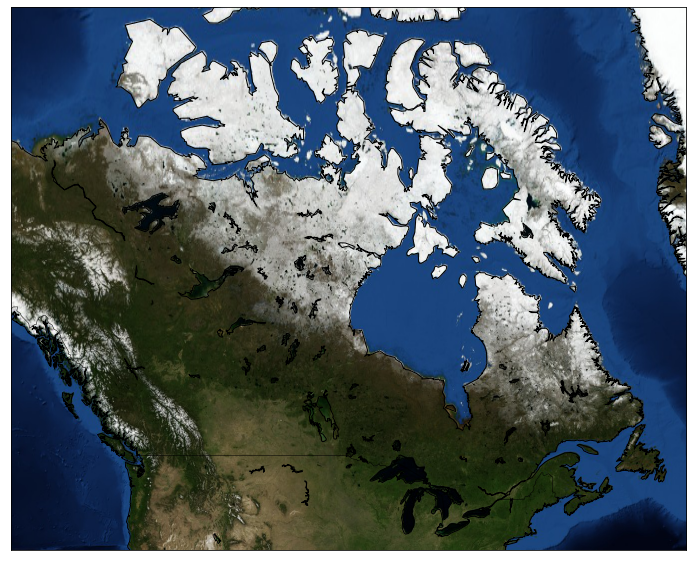

In [21]:
from mpl_toolkits.basemap import Basemap

plt.rcParams['figure.figsize'] = (14,10)

def prepare_map():
    canada_map = Basemap(projection='merc',
                         resolution='l', area_thresh=1000.0,
                         llcrnrlon=-140, llcrnrlat=40,
                         urcrnrlon=-50, urcrnrlat=75)
    canada_map.drawcoastlines()
    canada_map.drawcountries()
    canada_map.drawlsmask(land_color='orange', ocean_color='skyblue')
    canada_map.bluemarble()
    return canada_map

prepare_map()
plt.show()

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


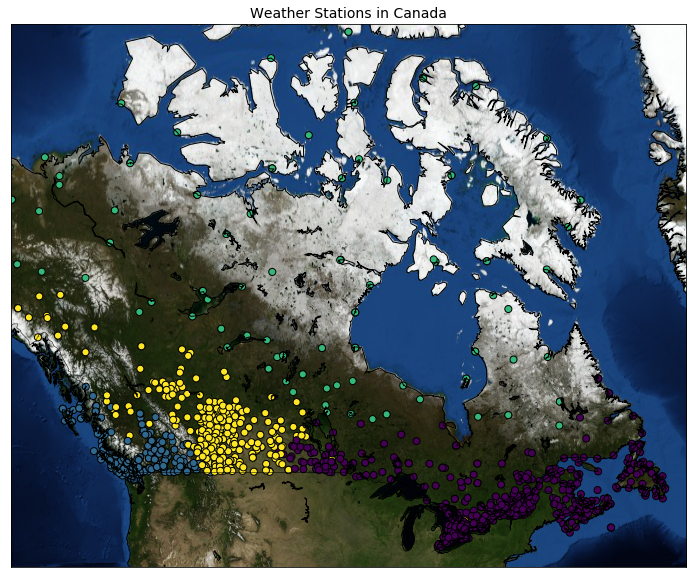

In [22]:
canada = prepare_map()

xs,ys = canada(np.asarray(weather.Long), np.asarray(weather.Lat))
weather['xm'] = xs.tolist()
weather['ym'] = ys.tolist() # współrzędne punktów dla odpowiednich stacji

canada.scatter(weather.xm, weather.ym, c=weather.cluster, edgecolors='k', s=50)
plt.title("Weather Stations in Canada", fontsize=14)
plt.show()

Jakie wnioski możemy na tej podstawie pozyskać? Spróbujmy dodać parametr opadów!

Klasteryzacja hierarchiczna

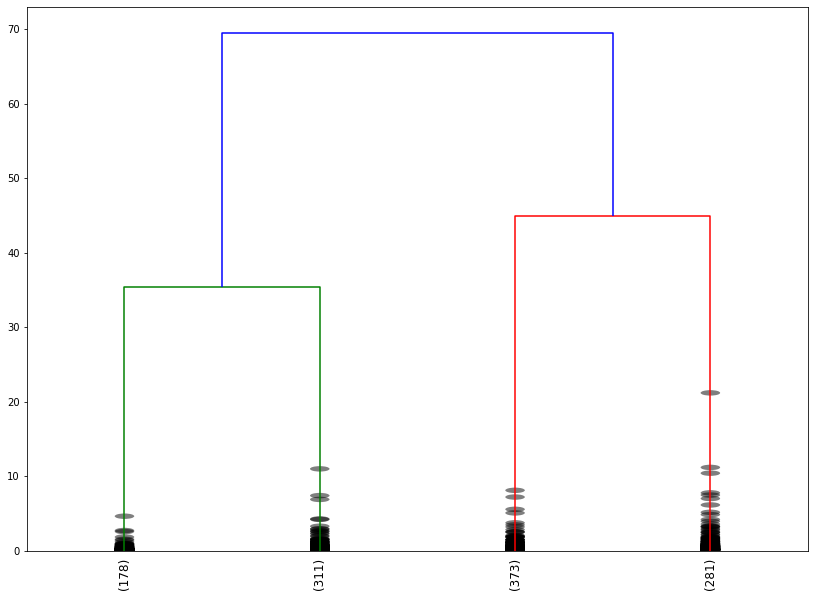

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

mergings = linkage(X_standard, method='ward')

dendrogram(
    mergings,
    truncate_mode='lastp',  # pokaż p ostatnich klastrów
    p=4,  # ile klastrów
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # rysunek rozkładu
)
plt.show()

oceńmy działanie klasteryzacji hierarchicznej w zależności od liczby rozpatrywanych poziomów

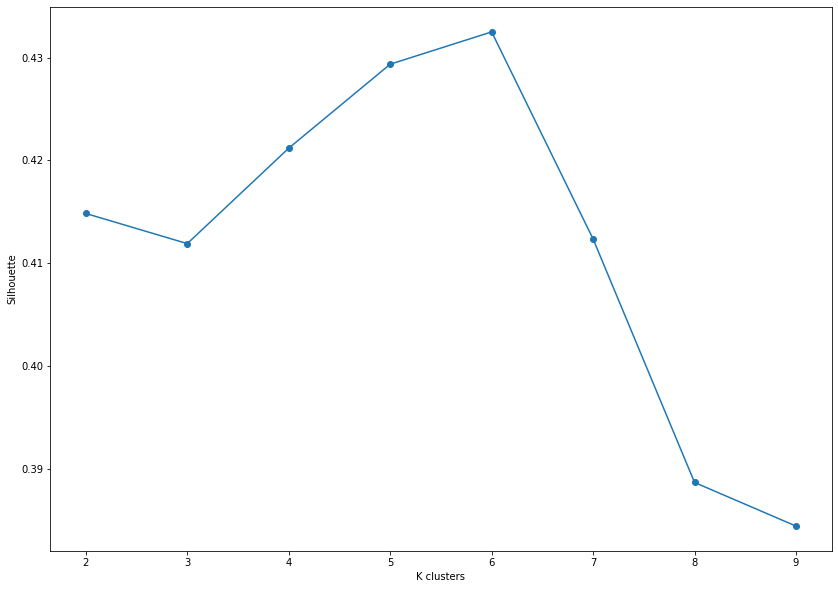

In [24]:
# assign clusters
from scipy.cluster.hierarchy import fcluster

silhouette = []
ks = range(2, 10)

for k in ks:
    prediction = fcluster(mergings, k, criterion='maxclust')
    silhouette.append(silhouette_score(X_standard, prediction))
    
fig, ax = plt.subplots()
ax.plot(ks, silhouette, '-o')
ax.set_xlabel('K clusters')
ax.set_ylabel('Silhouette')
ax.set_xticks(ks)
plt.show()

Lat   Long    Tm  DwTm    Tx  DwTx    Tn  DwTn      P  DwP  \
hierarchical                                                                
1             50.1 -123.4   6.0   1.2  13.1   1.1  -1.8   1.0  127.6  2.2   
2             52.1 -113.8  -7.8   1.7   9.5   1.5 -24.6   1.5   24.0  3.2   
3             46.1  -70.5 -14.4   4.1  -0.9   3.1 -29.0   3.2   61.0  2.5   
4             67.8  -88.7 -32.1   1.2 -17.8   1.2 -41.3   0.9    5.6  3.2   
5             62.4 -129.5 -17.4   0.9   4.9   0.8 -39.6   0.7   12.4  2.2   
6             52.3  -94.7 -21.6   1.3  -3.8   1.2 -37.5   1.1   18.6  1.7   

                Pd     HDD  CDD  cluster         xm         ym  
hierarchical                                                    
1             11.6   321.1  0.0      1.0  1841300.9  1601310.9  
2              5.5   681.7  0.0      2.7  2915172.1  1963109.0  
3              9.9   773.6  0.0      0.0  7731057.7   938353.0  
4              1.2  1342.9  0.0      2.0  5700451.0  5771228.8  
5              3.0   957.4  0.0      2.6  1163686.1  4155227.1  
6              4.6  1058.2  0.0      1.0  5039833.2  2014295.0

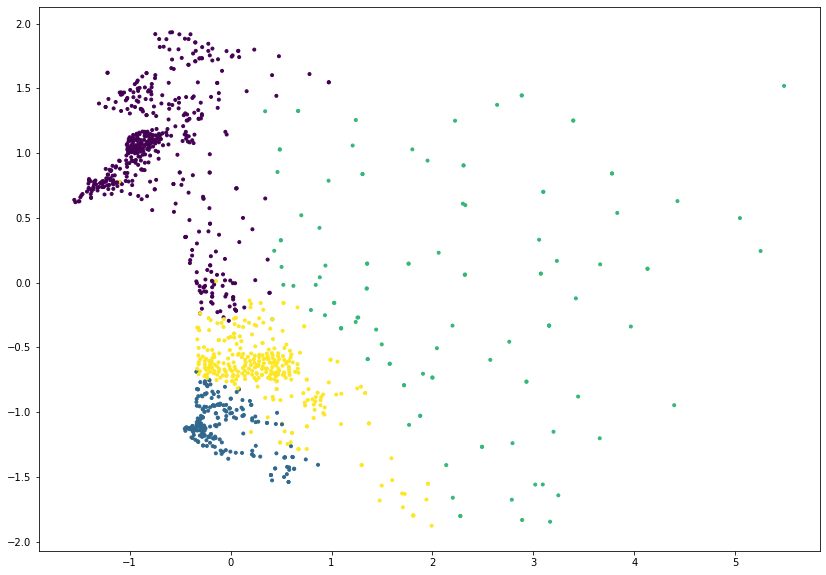

In [25]:
prediction = fcluster(mergings, 6, criterion='maxclust')
weather['hierarchical'] = prediction
mean_clusters = pd.DataFrame(weather.groupby('hierarchical').mean()).round(1)
display(mean_clusters)

fig, ax = plt.subplots()
ax.scatter(X_standard.Lat, X_standard.Long, c=y_pred, marker='.')
plt.show()

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


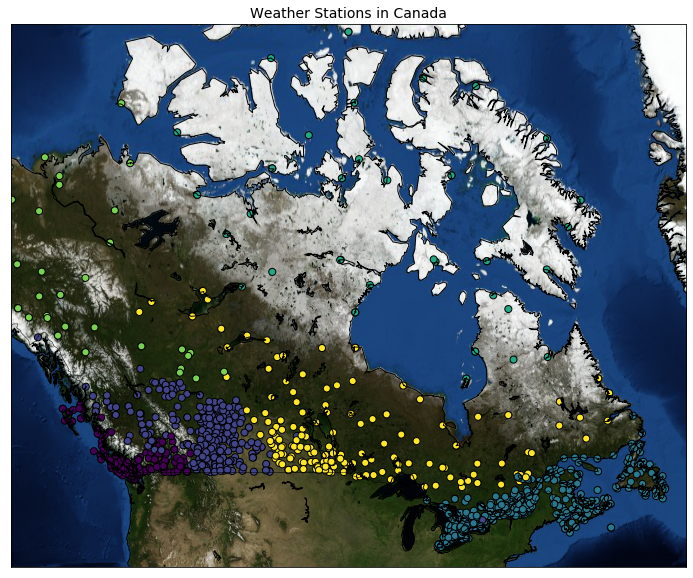

In [26]:
canada = prepare_map()

xs,ys = canada(np.asarray(weather.Long), np.asarray(weather.Lat))
weather['xm'] = xs.tolist()
weather['ym'] = ys.tolist() # współrzędne punktów dla odpowiednich stacji

canada.scatter(weather.xm, weather.ym, c=weather.hierarchical, edgecolors='k', s=50)
plt.title("Weather Stations in Canada", fontsize=14)
plt.show()

Ponownie, jaką wiedzę możemy uzyskać na tej podstawie?

Ostatnim algorytmem będzie DBSCAN. Ma on dwa parametry, które chcielibyśmy przebadać.

In [27]:
from sklearn.cluster import DBSCAN

model = DBSCAN()
y_pred = model.fit_predict(X_standard)
print(f'Silhouette: {silhouette_score(X_standard, y_pred)}')

Silhouette: 0.07563138467042349


In [28]:
for eps in np.arange(0.1, 1.5, 0.1):
    model = DBSCAN(eps=eps)
    y_pred = model.fit_predict(X_standard)
    print(f'eps={eps}, silhouette: {silhouette_score(X_standard, y_pred)}')
    print(f'  predicted {len(np.unique(y_pred))} clusters')

eps=0.1, silhouette: -0.36825354436391433
  predicted 6 clusters
eps=0.2, silhouette: -0.18521590197769772
  predicted 29 clusters
eps=0.30000000000000004, silhouette: 0.06124433262947277
  predicted 8 clusters
eps=0.4, silhouette: 0.1408747336967161
  predicted 8 clusters
eps=0.5, silhouette: 0.07563138467042349
  predicted 5 clusters
eps=0.6, silhouette: 0.1945341502844633
  predicted 6 clusters
eps=0.7000000000000001, silhouette: -0.03440151635949812
  predicted 6 clusters
eps=0.8, silhouette: 0.003402169718845082
  predicted 4 clusters
eps=0.9, silhouette: 0.42323430925808697
  predicted 2 clusters
eps=1.0, silhouette: 0.3749112442999171
  predicted 2 clusters
eps=1.1, silhouette: 0.4097156688645346
  predicted 2 clusters
eps=1.2000000000000002, silhouette: 0.4607813329243524
  predicted 2 clusters
eps=1.3000000000000003, silhouette: 0.500391143113716
  predicted 2 clusters
eps=1.4000000000000001, silhouette: 0.5624065047209413
  predicted 2 clusters


In [29]:
for i in range(2, 21):
    model = DBSCAN(eps=0.6, min_samples=i)
    y_pred = model.fit_predict(X_standard)
    print(f'n_samples={i}, silhouette: {silhouette_score(X_standard, y_pred)}')
    print(f'  predicted {len(np.unique(y_pred))} clusters')

n_samples=2, silhouette: -0.14292501697585733
  predicted 18 clusters
n_samples=3, silhouette: -0.12240673620892147
  predicted 13 clusters
n_samples=4, silhouette: -0.13004357150843873
  predicted 9 clusters
n_samples=5, silhouette: 0.1945341502844633
  predicted 6 clusters
n_samples=6, silhouette: 0.02825664756100382
  predicted 6 clusters
n_samples=7, silhouette: 0.058939876627431366
  predicted 4 clusters
n_samples=8, silhouette: 0.24353399437879014
  predicted 3 clusters
n_samples=9, silhouette: 0.24353399437879014
  predicted 3 clusters
n_samples=10, silhouette: 0.3711788722782067
  predicted 2 clusters
n_samples=11, silhouette: 0.3702905992378299
  predicted 2 clusters
n_samples=12, silhouette: 0.3674705384252628
  predicted 2 clusters
n_samples=13, silhouette: 0.3674705384252628
  predicted 2 clusters
n_samples=14, silhouette: 0.3646916580193098
  predicted 2 clusters
n_samples=15, silhouette: 0.3591278271729053
  predicted 2 clusters
n_samples=16, silhouette: 0.358051647984228

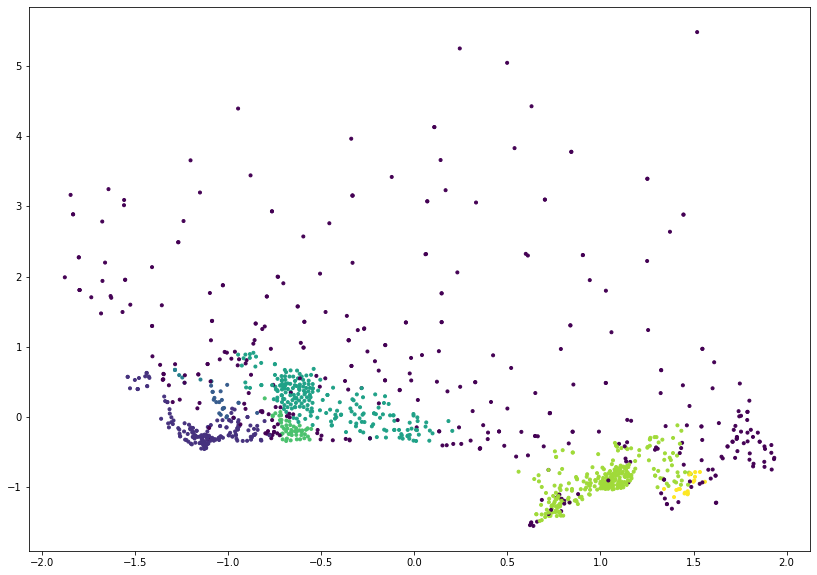

In [30]:
model = DBSCAN(eps=0.3, min_samples=10)
y_pred = model.fit_predict(X_standard)
weather['dbscan'] = y_pred

fig, ax = plt.subplots()
ax.scatter(X_standard.Long, X_standard.Lat, c=y_pred, marker='.')
plt.show()

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


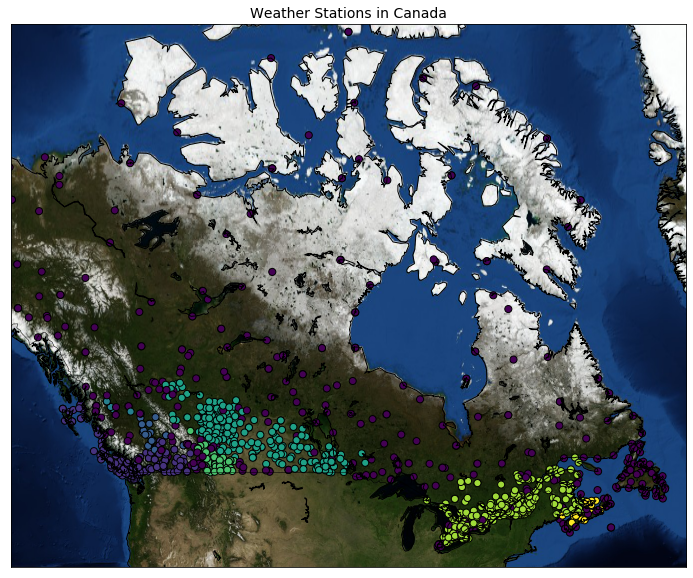

In [31]:
canada = prepare_map()

xs,ys = canada(np.asarray(weather.Long), np.asarray(weather.Lat))
weather['xm'] = xs.tolist()
weather['ym'] = ys.tolist() # współrzędne punktów dla odpowiednich stacji

canada.scatter(weather.xm, weather.ym, c=weather.dbscan, edgecolors='k', s=50)
plt.title("Weather Stations in Canada", fontsize=14)
plt.show()